In [1]:
import sys; sys.path.append('..')
import random, math
import pyzx as zx
from pyzx.linalg import *
from fractions import Fraction
%config InlineBackend.figure_format = 'svg'

In [148]:
import time

qubit_amount = 13
iterations = 100

print("Qubit count:", qubit_amount)

times = []

for depth in [200,400,800,1600, 2500]:
    count = 0
    t = time.time()
    for i in range(1,iterations+1):
        if i%50 == 0:
            print(i, end=' ')
        seed = random.randint(0,100000)
        random.seed(seed)
        circ = zx.cliffordT(qubit_amount, depth,p_t=0.2)
        g = circ.copy()
        zx.clifford_simp(g,quiet=True)
        g.normalise()
        c = continuous_extract(g)
        count += len(c.gates)
        #if not zx.compare_tensors(circ.to_tensor(),c.to_tensor()):
        #    raise Exception("Not equal")
    times.append((time.time()-t)/depth)
    print("\nStarting depth: ", depth)
    print("Average gate count:", count/float(iterations))
    print("Reduction: {:.1%}\n".format(1-(count/float(iterations))/depth))

Qubit count: 13
50 100 
Starting depth:  200
Average gate count: 228.89
Reduction: -14.4%

50 100 
Starting depth:  400
Average gate count: 410.11
Reduction: -2.5%

50 100 
Starting depth:  800
Average gate count: 779.76
Reduction: 2.5%

50 100 
Starting depth:  1600
Average gate count: 1478.98
Reduction: 7.6%

50 100 
Starting depth:  2500
Average gate count: 2321.62
Reduction: 7.1%



In [130]:
times

[0.026000468730926513,
 0.053905845284461976,
 0.13439435362815857,
 0.2084313890337944,
 0.25764179964065553]

Experiments:


Qubit count: 4


50 100 
Starting depth:  200
Average gate count: 105.44
Reduction: 47.3%

50 100 
Starting depth:  400
Average gate count: 200.95
Reduction: 49.8%

50 100 
Starting depth:  800
Average gate count: 387.89
Reduction: 51.5%

50 100 
Starting depth:  1600
Average gate count: 757.31
Reduction: 52.7%

50 100 
Starting depth:  2500
Average gate count: 1178.89
Reduction: 52.8%

50 100 
Starting depth:  5000
Average gate count: 2339.43
Reduction: 53.2%

times = `[0.014082347154617309,
 0.015004873871803284,
 0.014446367621421813,
 0.01545741394162178,
 0.016793507194519042,
 0.01939831700325012]`


Qubit count: 7


50 100 
Starting depth:  200
Average gate count: 152.22
Reduction: 23.9%

50 100 
Starting depth:  400
Average gate count: 276.4
Reduction: 30.9%

50 100 
Starting depth:  800
Average gate count: 526.31
Reduction: 34.2%

50 100 
Starting depth:  1600
Average gate count: 1017.35
Reduction: 36.4%

50 100 
Starting depth:  2500
Average gate count: 1581.45
Reduction: 36.7%


Qubit count: 10


50 100 
Starting depth:  200
Average gate count: 191.46
Reduction: 4.3%

50 100 
Starting depth:  400
Average gate count: 343.82
Reduction: 14.0%

50 100 
Starting depth:  800
Average gate count: 650.12
Reduction: 18.7%

50 100 
Starting depth:  1600
Average gate count: 1259.9
Reduction: 21.3%

50 100 
Starting depth:  2500
Average gate count: 1962.36
Reduction: 21.5%

50 100 
Starting depth:  5000
Average gate count: 3851.59
Reduction: 23.0%

times = `[0.01880471348762512,
 0.020604894757270814,
 0.022415057718753816,
 0.024065009653568267,
 0.025690890407562256,
 0.028920268106460572]`
 

Qubit count: 12


50 100 
Starting depth:  200
Average gate count: 215.54
Reduction: -7.8%

50 100 
Starting depth:  400
Average gate count: 390.13
Reduction: 2.5%

50 100 
Starting depth:  800
Average gate count: 721.57
Reduction: 9.8%

50 100 
Starting depth:  1600
Average gate count: 1415.25
Reduction: 11.5%

50 100 
Starting depth:  2500
Average gate count: 2176.43
Reduction: 12.9%


Qubit count: 15


50 100 
Starting depth:  200
Average gate count: 249.72
Reduction: -24.9%

50 100 
Starting depth:  400
Average gate count: 451.7
Reduction: -12.9%

50 100 
Starting depth:  800
Average gate count: 851.36
Reduction: -6.4%

50 100 
Starting depth:  1600
Average gate count: 1646.96
Reduction: -2.9%

50 100 
Starting depth:  2500
Average gate count: 2526.7
Reduction: -1.1%


Qubit count: 20



50 100 
Starting depth:  200
Average gate count: 295.62
Reduction: -47.8%

50 100 
Starting depth:  400
Average gate count: 546.46
Reduction: -36.6%

50 100 
Starting depth:  800
Average gate count: 1027.37
Reduction: -28.4%

50 100 
Starting depth:  1600
Average gate count: 1997.68
Reduction: -24.9%

50 100 
Starting depth:  2500
Average gate count: 3084.87
Reduction: -23.4%

times = `[0.026000468730926513,
 0.053905845284461976,
 0.13439435362815857,
 0.2084313890337944,
 0.25764179964065553]`

In [2]:
#nice circuit
#qubit_amount = 4
#depth = 50
#random.seed(1337)

qubit_amount = 8
depth = 4000
#random.seed(1340)

circ = zx.cliffordT(qubit_amount, depth,p_t=0.2)
#circ = zx.generate.cnots(qubit_amount,depth)
#zx.draw(circ)#,h_edge_draw='box')
g = circ.copy()
#zx.simplify.phase_free_simp(g,quiet=False)
zx.clifford_simp(g,quiet=False)
g.normalise()
gg = g
g = gg.copy()
#zx.draw(g,labels=True)

spider_simp
1011. 681. 450. 254. 139. 58. 16. 3. 2. 1. 
finished in 11 iterations
spider_simp

finished in 1 iterations
pivot_simp
202. 79. 23. 6. 
finished in 5 iterations
lcomp_simp
613. 207. 142. 76. 61. 39. 29. 24. 15. 13. 8. 5. 4. 2. 
finished in 15 iterations
pivot_simp
25. 8. 
finished in 3 iterations
id_simp
3. 
finished in 2 iterations
spider_simp
3. 
finished in 2 iterations


In [379]:
for block in range(2,qubit_amount+1):
    g = gg.copy()
    zx.extract.circuit_extract(g,cnot_blocksize=block)
    zx.simplify.to_rg(g)
    zx.simplify.to_rg(g)
    c = zx.Circuit.from_graph(g)
    #c = continuous_extract(g)
    print(block, len(c.gates))

2 731
3 622
4 596
5 582
6 591
7 587
8 579
9 591
10 597
11 594
12 608
13 596
14 645
15 634
16 635
17 635
18 635
19 635
20 635
21 635
22 634
23 634
24 629
25 630
26 640
27 634
28 646
29 657
30 635


In [334]:
[g for g in c.gates if not isinstance(g,CNOT)]

[HAD(2),
 HAD(3),
 HAD(4),
 HAD(7),
 HAD(9),
 HAD(10),
 HAD(14),
 HAD(17),
 HAD(21),
 HAD(22),
 HAD(24),
 HAD(27),
 HAD(29),
 HAD(30),
 HAD(31),
 HAD(32),
 HAD(33),
 HAD(34),
 HAD(36),
 HAD(37),
 HAD(38),
 HAD(40),
 HAD(42),
 HAD(43),
 HAD(46),
 HAD(47),
 HAD(48),
 HAD(52),
 HAD(53),
 HAD(55),
 HAD(57),
 HAD(58),
 HAD(59),
 HAD(4),
 HAD(49),
 HAD(50),
 HAD(48),
 HAD(20),
 HAD(44),
 HAD(5),
 HAD(54),
 HAD(34),
 HAD(19),
 HAD(9),
 HAD(33),
 HAD(52),
 HAD(42),
 HAD(23),
 HAD(15),
 HAD(55),
 HAD(2),
 HAD(37),
 HAD(28),
 HAD(53),
 HAD(46),
 HAD(17),
 HAD(6),
 HAD(25),
 HAD(18),
 HAD(30),
 HAD(0),
 HAD(1),
 HAD(2),
 HAD(3),
 HAD(4),
 HAD(5),
 HAD(6),
 HAD(7),
 HAD(8),
 HAD(9),
 HAD(10),
 HAD(11),
 HAD(12),
 HAD(13),
 HAD(14),
 HAD(15),
 HAD(16),
 HAD(17),
 HAD(18),
 HAD(19),
 HAD(20),
 HAD(21),
 HAD(22),
 HAD(23),
 HAD(24),
 HAD(25),
 HAD(26),
 HAD(27),
 HAD(28),
 HAD(29),
 HAD(30),
 HAD(31),
 HAD(32),
 HAD(33),
 HAD(34),
 HAD(35),
 HAD(36),
 HAD(37),
 HAD(38),
 HAD(39),
 HAD(40),
 HAD(41),


2768
3222


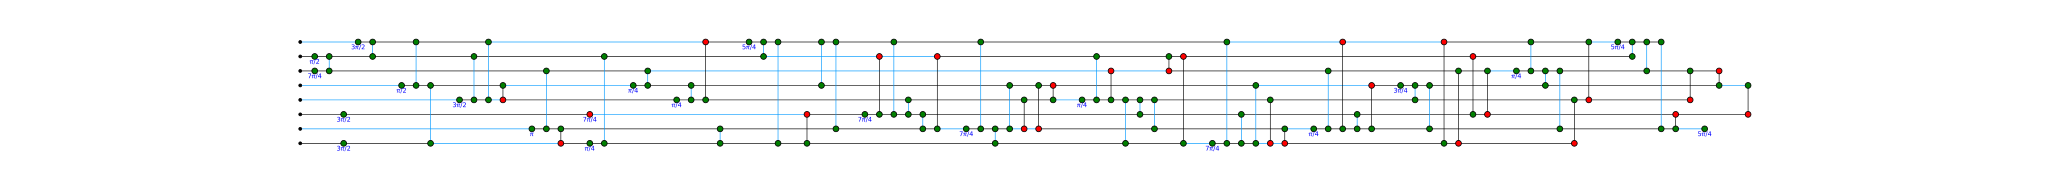

In [5]:
g = gg.copy()
c = zx.extract.streaming_extract(g)
swaps = []
for g in c.gates.copy():
    if isinstance(g, SWAP):
        swaps.append(g)
        c.gates.remove(g)
print(len(c.gates))
g = c.to_graph(compress_rows=True)
zx.simplify.id_simp(g,quiet=True)
zx.simplify.to_gh(g)
#zx.simplify.to_rg(g)
#zx.simplify.to_rg(g)
c = zx.Circuit.from_graph(g,split_phases=False)
print(len(c.gates))
zx.simplify.to_rg(g)
zx.draw(g,figsize=(35,3),rows=(0,100))

In [4]:
#g = circ.copy()
#zx.simplify.to_gh(g)
#c = zx.Circuit.from_graph(g,split_phases=False)

from pyzx.circuit import HAD, ZPhase, CZ, CNOT, SWAP
partition = []
gates = {i:list() for i in range(c.qubits)}
for g in c.gates:
    if isinstance(g,ZPhase):
        gates[g.target].append(ZPhase(g.target,g.phase))
    elif isinstance(g, HAD):
        gates[g.target].append(g)
    elif isinstance(g, CZ):
        gates[g.control].append(g)
        gates[g.target].append(g)
    else:
        raise TypeError("Unsupported gate {!s}".format(g))

while any(gates.values()):
    l = []
    for q, gs in gates.items():
        if gs and isinstance(gs[0], HAD):
            l.append(gs[0])
            gs.pop(0)
    partition.append(l)
    #active = {q:bool(gates[q]) for q in range(c.qubits)}
    l = []
    while True:
        conns = []
        for q in range(c.qubits):
            phases = []
            for i,g in enumerate(gates[q]):
                if isinstance(g, CZ):
                    q2 = g.control if g.target==q else g.target
                    conns.append((q,q2))
                elif isinstance(g, HAD):
                    break
                elif isinstance(g, ZPhase):
                    phases.append(i)
            for i in reversed(phases):
                l.append(gates[q].pop(i))
        for i,j in conns.copy():
            if (j,i) in conns and (i,j) in conns:
                g = CZ(i,j)
                l.append(g)
                gates[i].remove(g)
                gates[j].remove(g)
                conns.remove((i,j))
                conns.remove((j,i))
        
        moved_gates = False
        hadamard_blocked = []
        conns = []
        for q in range(c.qubits):
            if gates[q] and isinstance(gates[q][0],HAD):
                hadamard_blocked.append(q)
            else:
                for g in gates[q]:
                    if isinstance(g,CZ):
                        q2 = g.control if g.target==q else g.target
                        conns.append((q,q2))
                    elif isinstance(g,HAD):
                        break

        for q in hadamard_blocked:
            remove = []
            for i,g in enumerate(gates[q][1:]):
                if isinstance(g, CZ):
                    q2 = g.control if g.target==q else g.target
                    if q2 in hadamard_blocked: continue
                    if (q2,q) not in conns: continue
                    l.append(CNOT(q2,q))
                    gates[q2].remove(CZ(q2,q))
                    conns.remove((q2,q))
                    remove.append(i)
                    moved_gates = True
                elif isinstance(g, HAD): break
            for i in reversed(remove):
                gates[q].pop(i+1)
            if len(gates[q]) >= 2 and isinstance(gates[q][1], HAD): #double hadamard gate
                gates[q].pop(0)
                gates[q].pop(0)
        if not moved_gates: break
    if l: partition.append(l)
                    
            

TypeError: Unsupported gate CNOT(6,1)

In [52]:
blocks = list(range(1,len(partition),2))
print([len(partition[i]) for i in blocks])

[25, 22, 13, 7, 21, 11, 19, 13, 16, 11, 9, 15, 15, 25, 23, 32, 16, 19, 21, 19, 2, 28, 15, 16, 15, 11, 14, 19, 16, 10, 17, 17, 2, 13, 19, 3, 12, 19, 14, 25, 24, 12, 10, 8, 20, 11, 8, 10, 7, 17, 24, 23, 18, 12, 8, 17, 4, 24, 19, 32, 10, 4, 4, 1, 3, 10, 13, 21, 18, 9, 20, 19, 6, 14, 19, 16, 14, 13, 12, 11, 15, 14, 20, 18, 8, 14, 17, 21, 12, 17, 18, 14, 17, 17, 20, 17, 12, 26, 9, 8, 11, 7, 3, 6, 14, 11, 4, 8, 22, 11, 15, 19, 11, 24, 3, 5, 8, 14, 12, 11, 13, 18, 10, 11, 11, 18, 13, 12, 15, 22, 6, 1, 25, 16, 13, 13, 25, 17, 20, 15, 12, 6, 7, 18, 24, 18, 18, 8]


2840


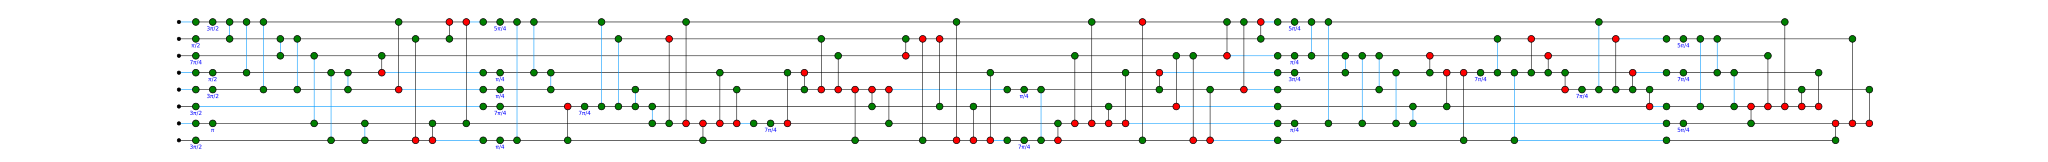

In [6]:
# c2 = zx.Circuit(c.qubits)
# for gs in partition:
#     for g in gs: c2.add_gate(g)
c2, partition = c.get_phase_polynomial_blocks()
print(len(c2.gates))
g2 = c2.to_graph(compress_rows=True)

zx.draw(g2,figsize=(40,3),rows=(0,100))
#zx.compare_tensors(c.to_tensor(),c2.to_tensor())

In [86]:
len(c2.gates)

301

In [301]:
from pyzx.circuit import CNOT, CZ, ZPhase

current = None
duration = 1
durations = []
for g in c.gates:
    if current == CZ and type(g) == ZPhase: continue
    if type(g) == current:
        duration += 1
    else:
        durations.append((type(g),duration))
        current = type(g)
        duration = 1

durations[:50]
    

[(pyzx.circuit.ZPhase, 0),
 (pyzx.circuit.CZ, 4),
 (pyzx.circuit.HAD, 1),
 (pyzx.circuit.ZPhase, 1),
 (pyzx.circuit.CZ, 1),
 (pyzx.circuit.HAD, 1),
 (pyzx.circuit.ZPhase, 1),
 (pyzx.circuit.CZ, 1),
 (pyzx.circuit.HAD, 1),
 (pyzx.circuit.ZPhase, 1),
 (pyzx.circuit.CZ, 1),
 (pyzx.circuit.HAD, 3),
 (pyzx.circuit.ZPhase, 1),
 (pyzx.circuit.CZ, 1),
 (pyzx.circuit.CNOT, 4),
 (pyzx.circuit.HAD, 1),
 (pyzx.circuit.ZPhase, 1),
 (pyzx.circuit.CZ, 1),
 (pyzx.circuit.CNOT, 5),
 (pyzx.circuit.HAD, 1),
 (pyzx.circuit.ZPhase, 1),
 (pyzx.circuit.CZ, 1),
 (pyzx.circuit.HAD, 2),
 (pyzx.circuit.ZPhase, 1),
 (pyzx.circuit.CZ, 1),
 (pyzx.circuit.HAD, 1),
 (pyzx.circuit.ZPhase, 1),
 (pyzx.circuit.CZ, 1),
 (pyzx.circuit.CNOT, 3),
 (pyzx.circuit.HAD, 1),
 (pyzx.circuit.ZPhase, 1),
 (pyzx.circuit.CZ, 1),
 (pyzx.circuit.CNOT, 2),
 (pyzx.circuit.HAD, 3),
 (pyzx.circuit.ZPhase, 1),
 (pyzx.circuit.CZ, 1),
 (pyzx.circuit.CNOT, 3),
 (pyzx.circuit.HAD, 1),
 (pyzx.circuit.ZPhase, 1),
 (pyzx.circuit.CZ, 1),
 (pyzx.circ

In [16]:
from pyzx.extract import cut_rank, bi_adj

left = [v for v in g.vertices() if g.row(v) == leftrow]
right = set()
for v in left: 
    n = list(w for w in g.neighbours(v) if g.row(w)>leftrow)
    #print(n)
    right.update(n)
right = list(right)
m = bi_adj(g,right,left)
print(left, right)

[236, 247, 266, 269, 270, 272, 280, 281, 284, 286, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297] [386, 388, 389, 390, 393, 396, 403, 410, 412, 414, 420, 424, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 435, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 334, 335, 337, 338, 339, 340, 341, 342, 343, 345, 348, 351, 354, 355, 356, 357, 361, 428, 363, 364, 365, 367, 370, 372, 373, 377, 378]


In [17]:
r = m.rows()
d = m.data
combs = {(i,):d[i] for i in range(r)}
counter = 0
shouldbreak = False
while not shouldbreak:
    combs2 = {}
    for index,l in combs.items():
        counter += 1
        for k in range(max(index)+1,r):
            row = xor_rows(combs[index],d[k])
            if sum(row) == 1:
                #return (*index,k), row
                shouldbreak = True
                break
            combs2[(*index,k)] = row
        if shouldbreak: break
    combs = combs2

In [21]:
list(combs.keys())[:10]

[(0, 6, 14, 16, 17, 18, 19),
 (1, 3, 4, 12, 13, 17, 19),
 (3, 5, 6, 9, 16, 17, 19),
 (1, 2, 4, 7, 10, 14, 19),
 (0, 3, 6, 12, 14, 16, 17),
 (1, 2, 10, 13, 14, 17, 18),
 (0, 2, 3, 6, 12, 17, 18),
 (2, 5, 7, 12, 13, 14, 16),
 (0, 4, 8, 9, 11, 12, 15),
 (6, 7, 10, 12, 13, 16, 17)]

In [121]:
g = g.adjoint()

In [125]:
leftrow = 3

KeyboardInterrupt: 

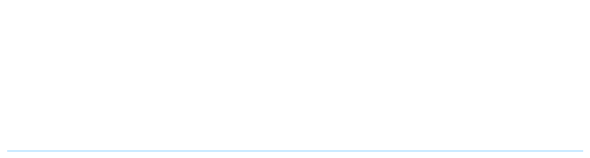

In [6]:
left = [v for v in g.vertices() if g.row(v) == leftrow]
right = set()
done = []
neigh = []
for v in left:
    d = [w for w in g.neighbours(v) if g.row(w)>leftrow]
    right.update(d)
    if len(d) == 0: raise TypeError("Not circuit like")
    if len(d) == 1 and g.type(d[0])!=0: 
        done.append(v)
        neigh.append(d[0])
if not done:
    print("Can't reduce further")
else:
    for v in g.vertices():
        if g.row(v) < leftrow: continue
        if v in done: continue
        g.set_row(v,g.row(v)+1)
    for i,v in enumerate(neigh):
        g.set_row(v,leftrow+1)
        g.set_qubit(v,g.qubit(done[i]))
    leftrow += 1
#zx.draw(g,labels=True)

In [129]:
zx.compare_tensors(g.to_tensor(),circ.to_tensor())

True

In [178]:
def gaussian_reduce(g, left, right):
    right = list(right)
    m = bi_adj(g,right,left)
    for i in range(m.rows()):
        for j in range(i+1,m.rows()):
            if sum(1 for k in range(len(m.data[i])) if m.data[i][k] != m.data[j][k]) == 1:
                print("Found a match: ", i, j)
                if sum(m.data[i]) < sum(m.data[j]):
                    control = i
                    target = j
                else:
                    control = j
                    target = i
                for k in range(len(m.data[control])):
                    if not m.data[control][k]: continue
                    if m.data[target][k]: g.remove_edge((left[target],right[k]))
                    else: g.add_edge((left[target],right[k]), 2)
                return
            
gaussian_reduce(g, left, right)

Found a match:  0 1


In [133]:
def continuous_extract(g):
    #g = g.copy()
    g.normalise()
    qs = g.qubits()
    rs = g.rows()
    ty = g.types()
    phases = g.phases()
    c = zx.Circuit(g.qubit_count())
    leftrow = 1
    
    while True:
        left = [v for v in g.vertices() if rs[v] == leftrow]
        boundary_verts = []
        right = set()
        good_verts = []
        good_neighs = []
        for v in left:
            # First add the processed gates
            q = qs[v]
            phase = phases[v]
            t = ty[v]
            neigh = [w for w in g.neighbours(v) if rs[w]<leftrow]
            if len(neigh) != 1:
                print("Graph doesn't seem circuit like: multiple parents")
                break
            n = neigh[0]
            if qs[n] != q:
                print("Graph doesn't seem circuit like: cross qubit connections")
                break
            if g.edge_type(g.edge(n,v)) == 2:
                c.add_gate("HAD", q)
                g.set_edge_type(g.edge(n,v),1)
            if t == 0: continue # it is an output
            if phase != 0:
                if t == 1: c.add_gate("ZPhase", q, phase=phase)
                else: c.add_gate("XPhase", q, phase=phase)
                g.set_phase(v, 0)
            neigh = [w for w in g.neighbours(v) if rs[w]==leftrow and w<v]
            for n in neigh:
                t2 = ty[n]
                q2 = qs[n]
                if t == t2:
                    if g.edge_type(g.edge(v,n)) != 2:
                        raise TypeError("Invalid vertical connection between vertices of the same type")
                    if t == 1: c.add_gate("CZ", q2, q)
                    else: c.add_gate("CX", q2, q)
                else:
                    if g.edge_type(g.edge(v,n)) != 1:
                        raise TypeError("Invalid vertical connection between vertices of different type")
                    if t == 1: c.add_gate("CNOT", q, q2)
                    else: c.add_gate("CNOT", q2, q)
                g.remove_edge(g.edge(v,n))
            # Done processing gates, start looking for progress
            d = [w for w in g.neighbours(v) if rs[w]>leftrow]
            right.update(d)
            if len(d) == 0: raise TypeError("Not circuit like")
            if len(d) == 1:
                if ty[d[0]] != 0: # single neighbour that is not an output
                    good_verts.append(v)
                    good_neighs.append(d[0])
                else: 
                    boundary_verts.append(v)
                    right.remove(d[0])
        if not good_verts:
            if all(ty[v] == 0 for v in right): break
            for v in boundary_verts: left.remove(v)
            right = list(right)
            m = bi_adj(g,right,left)
            sequence = greedy_reduction(m)
            if not sequence:
                print("Too many gauss reductions")
                break
            #print("sequence:", sequence)
            for control, target in sequence:
                c.add_gate("CNOT", qs[left[target]], qs[left[control]])
                # If a control is connected to an output, we need to add a new node.
                for v in g.neighbours(left[control]):
                    if v in g.outputs:
                        #print("Adding node before output")
                        q = qs[v]
                        r = rs[v]
                        w = g.add_vertex(1,q,r-1)
                        e = g.edge(left[control],v)
                        et = g.edge_type(e)
                        g.remove_edge(e)
                        g.add_edge((left[control],w),2)
                        g.add_edge((w,v),3-et)
                        k = right.index(v)
                        right[k] = w
                        break
                for k in range(len(m.data[control])):
                    if not m.data[control][k]: continue
                    if m.data[target][k]: g.remove_edge((left[target],right[k]))
                    else: g.add_edge((left[target],right[k]), 2)
                m.row_add(control, target)
            d = [w for w in g.neighbours(left[target]) if rs[w]>leftrow]
            if len(d) != 1:
                print("Gaussian reduction did something wrong")
                break
            if ty[d[0]] != 0:
                good_verts.append(left[target])
                good_neighs.append(d[0])
            else: continue
        
        for v in g.vertices():
            if rs[v] < leftrow: continue
            if v in good_verts: continue
            g.set_row(v,rs[v]+1)
        for i,v in enumerate(good_neighs):
            g.set_row(v,leftrow+1)
            g.set_qubit(v,qs[good_verts[i]])
        leftrow += 1
            
    swap_map = {}
    leftover_swaps = False
    for v in left:
        q = qs[v]
        neigh = [w for w in g.neighbours(v) if rs[w]>leftrow]
        if len(neigh) != 1: 
            print("Not fully reducable")
            return c
        n = neigh[0]
        if ty[n] != 0: 
            print("Not fully reducable")
            return c
        if g.edge_type(g.edge(n,v)) == 2:
            c.add_gate("HAD", q)
            g.set_edge_type(g.edge(n,v),1)
        if qs[n] != q: leftover_swaps = True
        swap_map[q] = qs[n]
    if leftover_swaps: 
        #print("Adding final swaps")
        for t1, t2 in permutation_as_swaps(swap_map):
            c.add_gate("SWAP", t1, t2)
    return c

In [86]:
def xor_rows(l1, l2):
    return [0 if l1[i]==l2[i] else 1 for i in range(len(l1))]

global global_m
global_m = None

def find_minimal_sums(m):
    global global_m
    r = m.rows()
    d = m.data
    if r == 0: 
        print("r is 0")
        print(d)
        return None
    combs = {(i,):d[i] for i in range(r)}
    combs2 = {}
    #iterations = 0
    try:
        while True:
            combs2 = {}
            for index,l in combs.items():
                #iterations += 1
                #if iterations > 50000: return None
                for k in range(max(index)+1,r):
                    row = xor_rows(combs[index],d[k])
                    if sum(row) == 1:
                        return (*index,k)
                    combs2[(*index,k)] = row
            if not combs2:
                print("combs2 empty", len(combs), len(list(combs.keys())[0]), r)
                global_m = m
                return None
            combs = combs2
    except:
        print("iterations",iterations, len(combs), len(combs2))
        raise

def greedy_reduction(m):
    indices = find_minimal_sums(m)
    if not indices: return None
    indices = list(indices)
    rows = {i:m.data[i] for i in indices}
    weights = {i: sum(r) for i,r in rows.items()}
    result = []
    while len(indices)>1:
        best = (-1,-1)
        reduction = -10000
        for i in indices:
            for j in indices:
                if j <= i: continue
                w = sum(xor_rows(rows[i],rows[j]))
                if weights[i] - w > reduction:
                    best = (j,i) # "Add row j to i"
                    reduction = weights[i] - w
                if weights[j] - w > reduction:
                    best = (i,j)
                    reduction = weights[j] - w
        result.append(best)
        control, target = best
        rows[target] = xor_rows(rows[control],rows[target])
        weights[target] = weights[target] - reduction
        indices.remove(control)
    return result

In [146]:
g = gg.copy()
%time c = continuous_extract(g)

iterations 100 3838380 1398101


MemoryError: 

In [70]:
m = global_m.copy()
m.gauss()
m

[ 1  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0 ]
[ 0  1  0  1  0  0  0  0  0  0  0  0  0  0  0  0 ]
[ 0  0  1  0  1  0  1  0  0  0  1  0  0  0  0  0 ]
[ 0  0  0  1  0  0  1  1  1  0  0  0  0  0  0  0 ]
[ 0  0  0  0  1  0  0  1  0  0  0  0  1  0  1  0 ]
[ 0  0  0  0  0  1  1  1  0  0  0  0  1  1  1  0 ]
[ 0  0  0  0  0  0  1  1  0  1  0  0  1  1  1  0 ]
[ 0  0  0  0  0  0  0  0  1  1  0  0  1  0  1  0 ]
[ 0  0  0  0  0  0  0  0  0  1  0  0  0  1  0  0 ]
[ 0  0  0  0  0  0  0  0  0  0  1  1  1  0  1  0 ]
[ 0  0  0  0  0  0  0  0  0  0  0  1  0  1  0  0 ]
[ 0  0  0  0  0  0  0  0  0  0  0  0  1  1  1  1 ]
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  1 ]

In [143]:
print(len(c.gates))
print(c.gates[-30:])

125
[CZ(10,7), CZ(5,7), HAD(3), CZ(1,3), CZ(8,3), CZ(4,3), CZ(0,3), CZ(14,3), CZ(3,11), CZ(3,7), HAD(4), HAD(0), HAD(14), HAD(1), HAD(8), HAD(11), HAD(7), SWAP(0,5), SWAP(2,10), SWAP(3,7), SWAP(4,11), SWAP(5,12), SWAP(6,10), SWAP(7,14), SWAP(8,12), SWAP(9,12), SWAP(10,13), SWAP(11,12), SWAP(12,14), SWAP(13,14)]


In [72]:
#zx.simplify.id_simp(g)
#g.normalise()
[len(g.neighbours(i)) for i in g.outputs]

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1]

124


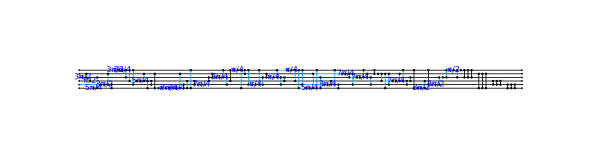

In [235]:
h = c.to_graph()
print(len(zx.Circuit.from_graph(h).gates))
#zx.simplify.id_simp(g, quiet=True)
#h.compose(g)
zx.draw(h)

In [232]:
zx.compare_tensors(h.to_tensor(),circ.to_tensor())

True

In [79]:
perm = {0:0, 1:1}
def permutation_as_swaps(perm):
    swaps = []
    l = [perm[i] for i in range(len(perm))]
    pinv = {v:k for k,v in perm.items()}
    linv = [pinv[i] for i in range(len(pinv))]
    for i in range(len(perm)):
        if l[i] == i: continue
        t1 = l[i]
        t2 = linv[i]
        swaps.append((i,t2))
        #l[i] = i
        #linv[i] = i
        l[t2] = t1
        linv[t1] = t2
    return swaps
        
    
permutation_as_swaps(perm)

[]

id_simp
12. 
finished in 2 iterations


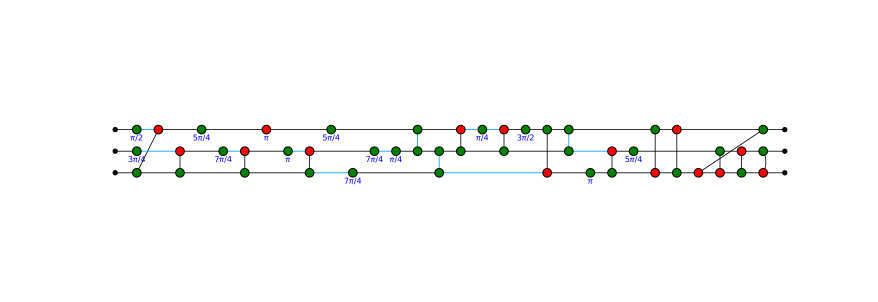

In [138]:
gg = c.to_graph()
zx.simplify.id_simp(gg)
zx.simplify.to_rg(gg)
#print(len(zx.Circuit.from_graph(gg).gates))
gg.normalise()
zx.draw(gg,figsize=(12,4))

In [137]:
zx.compare_tensors(gg.to_tensor(),g.to_tensor())

False

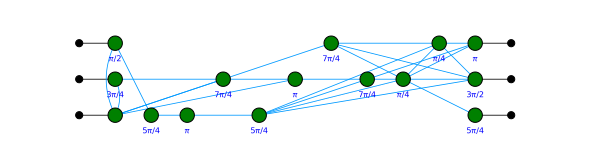

In [110]:
zx.draw(g)

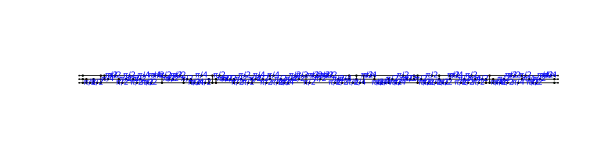

In [131]:
zx.draw(circ)

In [57]:
def gadgetize(g, qubits):
    newv = g.vindex
    for v in list(g.vertices()):
        va = g.get_angle(v)
        vt = g.get_type(v)
        vq = g.get_vdata(v,'q')
        vr = g.get_vdata(v,'r')
        if va.denominator > 2:
            g.set_angle(v, 0)
            
            g.add_vertex()
            g.set_type(newv, 2)
            g.set_vdata(newv, 'q', qubits)
            g.set_vdata(newv, 'r', vr)
            newv+=1
            
            g.add_vertex()
            g.set_type(newv, vt)
            g.set_angle(newv, va)
            g.set_vdata(newv, 'q', qubits+1)
            g.set_vdata(newv, 'r', vr)
            newv += 1
            
            g.add_edges([(v,newv-2),(newv-2,newv-1)])

In [13]:
zx.spider_simp(circ)
zx.drawing.pack_circuit_ranks(circ)
gadgetize(circ)

spider_simp

finished in 1 iterations


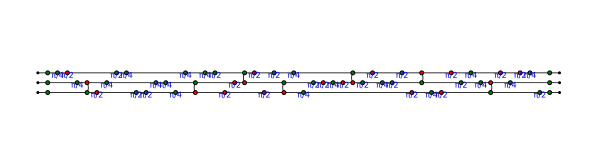

In [74]:
zx.draw(circ)

In [3]:
random.seed(1337)
circ = zx.examples.cliffordT(3, 1000, p_t=0.02)
print('t-count:', zx.t_count(circ))
zx.clifford_simp(circ)
zx.drawing.pack_circuit_ranks(circ)
print('t-count:', zx.t_count(circ))

t-count: 11
spider_simp
260. 185. 113. 64. 37. 13. 7. 2. 1. 
finished in 10 iterations
pivot_simp
75. 36. 11. 2. 
finished in 5 iterations
lcomp_simp
168. 60. 46. 33. 25. 15. 10. 8. 4. 4. 3. 3. 3. 2. 3. 2. 2. 2. 1. 2. 2. 1. 
finished in 23 iterations
pivot_simp
1. 
finished in 2 iterations
t-count: 7


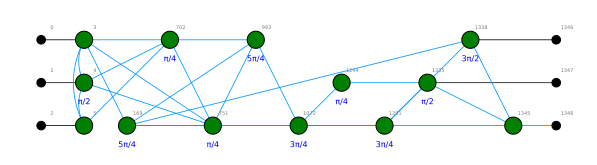

In [4]:
zx.draw(circ, labels=True)

In [12]:
# WORKS
#random.seed(1337)
#circ = zx.examples.cliffordT(4, 400, p_t=0.1)

# WORKS
random.seed(140)
circ = zx.examples.cliffordT(4, 40, p_t=0.5)
print('t-count:', zx.t_count(circ))
zx.clifford_simp(circ)
zx.drawing.pack_circuit_ranks(circ)
print('t-count:', zx.t_count(circ))

t-count: 15
spider_simp
11. 7. 5. 1. 1. 1. 
finished in 7 iterations
pivot_simp
1. 1. 
finished in 3 iterations
lcomp_simp
9. 1. 1. 1. 
finished in 5 iterations
pivot_simp

finished in 1 iterations
t-count: 5


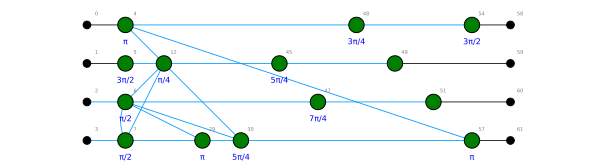

In [13]:
zx.draw(circ, labels=True)

terminated normally


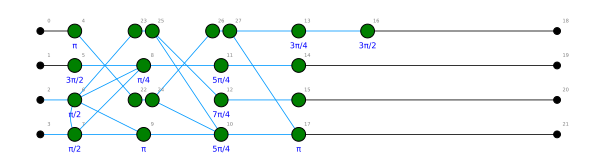

In [15]:
g = circ.copy()
zx.cut_extract(g,4)
zx.draw(g, labels=True)

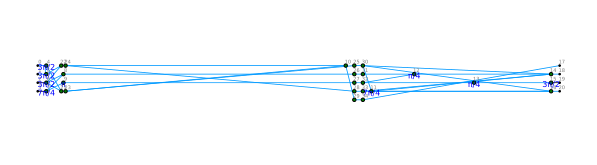

In [3]:
#g = circ.copy()
#zx.pack_circuit_ranks(g)
zx.draw(g,labels=True)

In [10]:
zx.extract.after(g,[8,21,22,23])
zx.extract.bi_adj(g,[8,21,22,23],[10, 25, 26, 27]).rank()

4

In [11]:
zx.clifford_simp(g)

spider_simp

finished in 1 iterations
pivot_simp
4. 2. 2. 1. 
finished in 5 iterations
lcomp_simp
1. 
finished in 2 iterations
pivot_simp

finished in 1 iterations


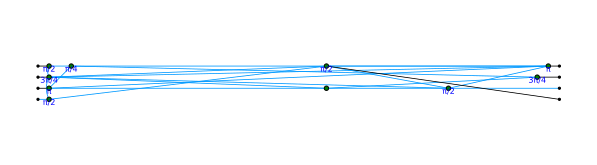

In [12]:
zx.draw(g)

In [5]:
qubits = 4

random.seed(240)

for i in range(126):
    circ = zx.generate.cliffordT(qubits, 40, p_t=0.1)
circ = zx.generate.cliffordT(qubits, 40, p_t=0.1)
zx.clifford_simp(circ)
g = circ.copy()
#zx.cut_extract(g,qubits)

spider_simp
11. 7. 4. 3. 1. 
finished in 6 iterations
pivot_simp
4. 3. 
finished in 3 iterations
lcomp_simp
7. 2. 1. 
finished in 4 iterations
pivot_simp
2. 
finished in 2 iterations
id_simp

finished in 1 iterations


In [387]:
import math
from fractions import Fraction
print(Fraction(-3.926990816987241e-1/math.pi).limit_denominator())
print(Fraction(-1.963495408493621e-1/math.pi).limit_denominator())
print(Fraction(-9.817477042468103e-2/math.pi).limit_denominator())
print(Fraction(-1.533980787885641e-3/math.pi).limit_denominator())

-1/8
-1/16
-1/32
-1/2048
